Python notebook to calculate tokenizer fertility and other potential stats based on a small text sample.

## Data loading and Libraries

In [2]:
import pandas as pd


In [3]:
# /home/p0l3/RAD/CWED4ETA/CWED4ETA/CWED4ETA/RESULTS/GLINER_TS_LS/
IDs = [10061, 10167, 10662, 1072, 10756, 12778, 13006, 13798, 16783, 16811, 170785, 170943, 171290, 171401, 20390, 21622, 22971, 2416, 27835, 28638, 28901, 30003, 32771, 33310, 35800, 36618, 39322, 40290, 41282, 45266, 46034, 48798, 50441, 53166, 55512, 56596, 62269, 63539, 65955, 6641, 71590, 72392, 72508, 72553, 75726, 84006, 86033, 87857, 90439, 99773]


In [4]:
import os
DIR = "/home/p0l3/RAD/REL_DIS/REL_DIS/TOKENIZED/PAPERS_SENTENCES"

file_list = os.listdir(DIR)

sample_list = [f for f in file_list if int(f.split("_")[0]) in IDs and "DUP" not in f]

In [5]:
from transformers import BertTokenizer, RobertaTokenizer

# Load SciBERT tokenizer
tokenizer1 = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
tokenizer2 = BertTokenizer.from_pretrained("P0L3/clirebert_clirevocab_uncased")
tokenizer3 = RobertaTokenizer.from_pretrained("climatebert/distilroberta-base-climate-f")
tokenizer4 = BertTokenizer.from_pretrained("bert-base-uncased")

def average_subwords_per_word(tokenizer, paper_text: str):
    # Basic whitespace-based word split
    words = paper_text.strip().split()
    
    total_subwords = 0
    for word in words:
        subwords = tokenizer.tokenize(word)
        # print(f"Word: {word} --> Subwords: {subwords}")
        total_subwords += len(subwords)
    
    if len(words) == 0:
        return 0.0
    return round(total_subwords / len(words), 5)

print("SciBERT\tCliReBERT")
# for paper in sample_list:
#     with open(DIR + "/" + paper) as f:
#         paper_text = f.read()
    
#     print(average_subwords_per_word(tokenizer1, paper_text), "\t", average_subwords_per_word(tokenizer2, paper_text))


SciBERT	CliReBERT


In [6]:
import matplotlib.pyplot as plt

scibert_scores = []
clirebert_scores = []
climatebert_scores = []
bert_scores = []
paper_labels = []

for paper in sample_list:
    with open(DIR + "/" + paper) as f:
        paper_text = f.read()
    
    sci_score = average_subwords_per_word(tokenizer1, paper_text)
    cli_score = average_subwords_per_word(tokenizer2, paper_text)
    climate_score = average_subwords_per_word(tokenizer3, paper_text)
    bert_score = average_subwords_per_word(tokenizer4, paper_text)

    scibert_scores.append(sci_score)
    clirebert_scores.append(cli_score)
    climatebert_scores.append(climate_score)
    bert_scores.append(bert_score)
    
    paper_labels.append(paper.split("_")[0])

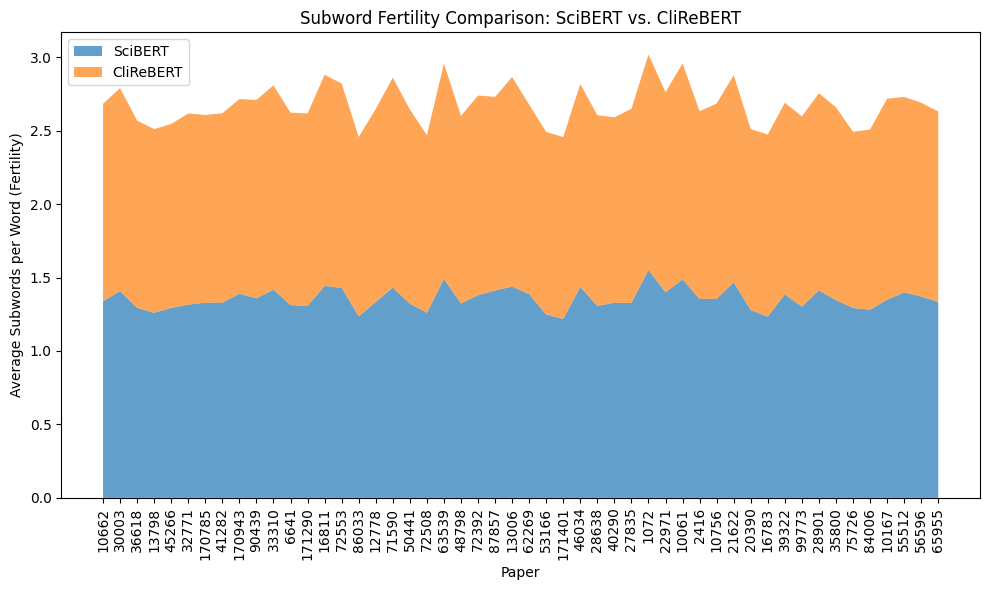

In [10]:
# Create stackplot
x = list(range(len(sample_list)))

plt.figure(figsize=(10, 6))
plt.stackplot(x, scibert_scores, clirebert_scores, labels=["SciBERT", "CliReBERT"], alpha=0.7)

plt.xticks(x, paper_labels, rotation=90)
plt.ylabel("Average Subwords per Word (Fertility)")
plt.xlabel("Paper")
plt.title("Subword Fertility Comparison: SciBERT vs. CliReBERT")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

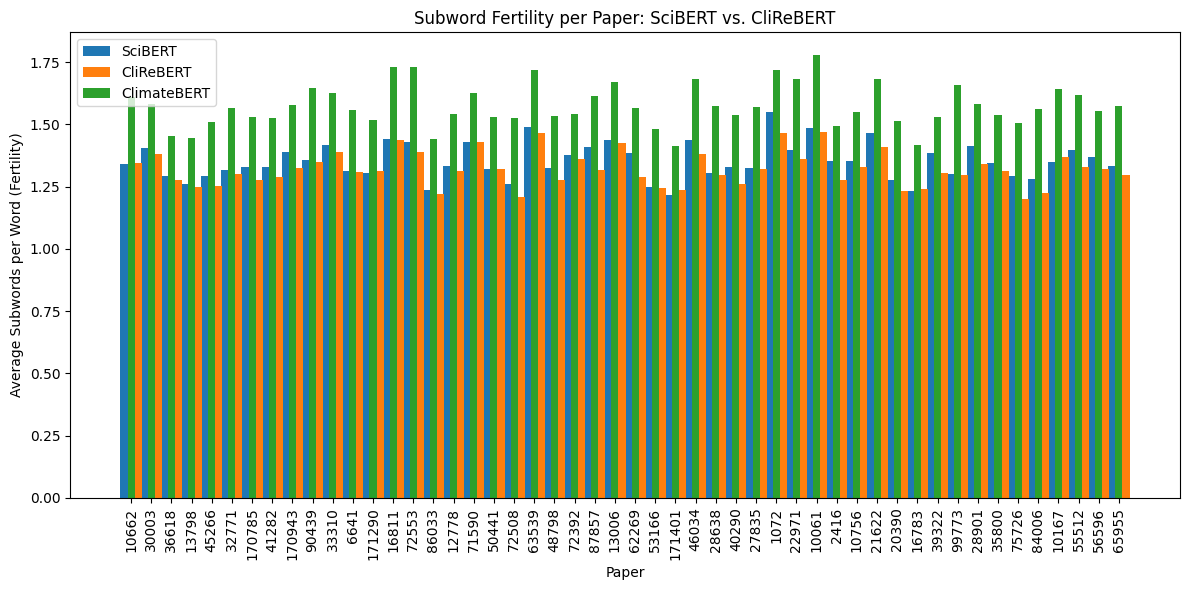

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(sample_list))  # X locations for groups
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width, scibert_scores, width, label="SciBERT")
plt.bar(x + width, clirebert_scores, width, label="CliReBERT")
plt.bar(x, climatebert_scores, width, label="ClimateBERT")

plt.ylabel("Average Subwords per Word (Fertility)")
plt.xlabel("Paper")
plt.title("Subword Fertility per Paper: SciBERT vs. CliReBERT")
plt.xticks(x, paper_labels, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


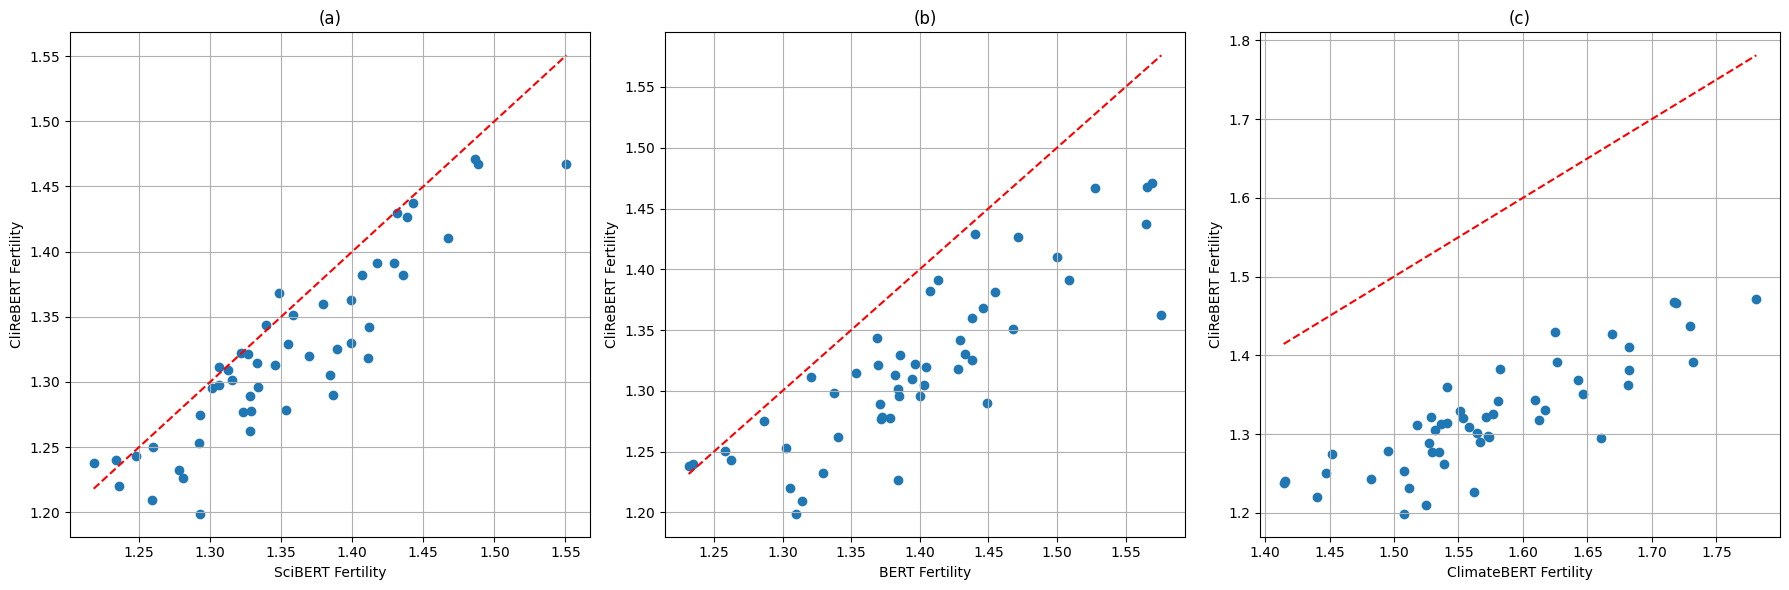

In [44]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# SciBERT vs. CliReBERT Fertility
axs[0].scatter(scibert_scores, clirebert_scores)
axs[0].plot([min(scibert_scores), max(scibert_scores)], [min(scibert_scores), max(scibert_scores)], 'r--')
axs[0].set_xlabel("SciBERT Fertility")
axs[0].set_ylabel("CliReBERT Fertility")
axs[0].set_title("(a)")
axs[0].grid(True)

# ClimateBERT vs. CliReBERT Fertility
axs[2].scatter(climatebert_scores, clirebert_scores)
axs[2].plot([min(climatebert_scores), max(climatebert_scores)], [min(climatebert_scores), max(climatebert_scores)], 'r--')
axs[2].set_xlabel("ClimateBERT Fertility")
axs[2].set_ylabel("CliReBERT Fertility")
axs[2].set_title("(c)")
axs[2].grid(True)

# BERT vs. CliReBERT Fertility
axs[1].scatter(bert_scores, clirebert_scores)
axs[1].plot([min(bert_scores), max(bert_scores)], [min(bert_scores), max(bert_scores)], 'r--')
axs[1].set_xlabel("BERT Fertility")
axs[1].set_ylabel("CliReBERT Fertility")
axs[1].set_title("(b)")
axs[1].grid(True)

# Adjust layout to make sure there is no overlap
plt.tight_layout()
plt.show()




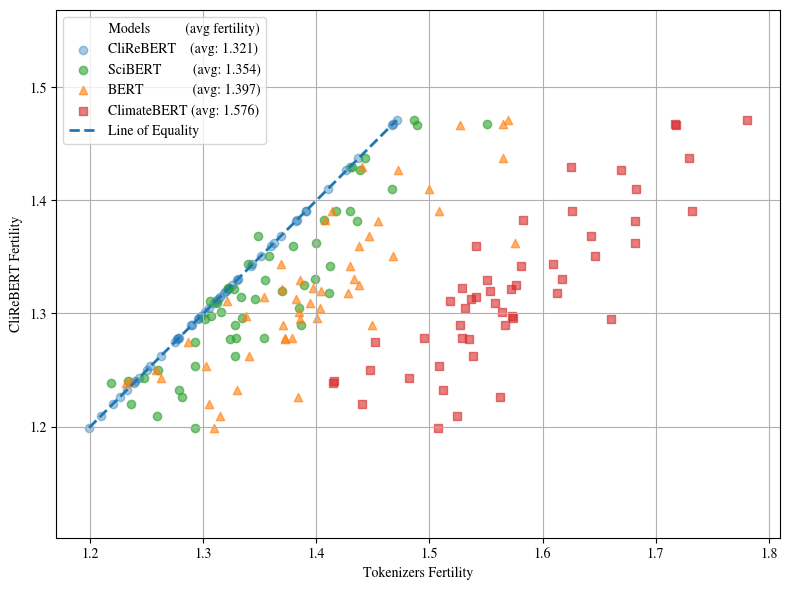

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["font.family"] = "Nimbus Roman"

# Compute averages
avg_scibert = np.mean(scibert_scores)
avg_climatebert = np.mean(climatebert_scores)
avg_bert = np.mean(bert_scores)
avg_clirebert = np.mean(clirebert_scores)

# Create a single figure and axis
plt.figure(figsize=(8, 6))

# CliReBERT entry
plt.scatter(clirebert_scores, clirebert_scores, color='tab:blue', alpha=0.4, label=f"CliReBERT    (avg: {avg_clirebert:.3f})")

# SciBERT vs. CliReBERT Fertility (Green circles)
plt.scatter(scibert_scores, clirebert_scores, color='tab:green',
            label=f"SciBERT         (avg: {avg_scibert:.3f})", alpha=0.6, marker='o')

# BERT vs. CliReBERT Fertility (Orange triangles)
plt.scatter(bert_scores, clirebert_scores, color='tab:orange',
            label=f"BERT              (avg: {avg_bert:.3f})", alpha=0.6, marker='^')

# ClimateBERT vs. CliReBERT Fertility (Red squares)
plt.scatter(climatebert_scores, clirebert_scores, color='tab:red',
            label=f"ClimateBERT (avg: {avg_climatebert:.3f})", alpha=0.6, marker='s')


# Line of equality

plt.plot([min(clirebert_scores), max(clirebert_scores)], 
         [min(clirebert_scores), max(clirebert_scores)], '--', color="tab:blue", linewidth=2, label="Line of Equality")
plt.axis("equal")

# Labels and legend
plt.xlabel("Tokenizers Fertility")
plt.ylabel("CliReBERT Fertility")
plt.legend(loc="upper left", title="           Models          (avg fertility)")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
from transformers import AutoTokenizer, AutoModelForMaskedLM, pipeline
import torch

# Load the pretrained model and tokenizer
model_name = "P0L3/sciclimatebert"  # Replace with actual model name
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForMaskedLM.from_pretrained(model_name)

# Move model to GPU if available
device = 0 if torch.cuda.is_available() else -1

# Create a fill-mask pipeline
fill_mask = pipeline("fill-mask", model=model, tokenizer=tokenizer, device=device)

# Example input from scientific climate literature
text = "The increase in greenhouse gas emissions has significantly affected the <mask> balance of the Earth."

# Run prediction
predictions = fill_mask(text)

# Show top predictions
print(text)
print(10*">")
for p in predictions:
    print(f"{p['sequence']} — {p['score']:.4f}")


The increase in greenhouse gas emissions has significantly affected the <mask> balance of the Earth.
>>>>>>>>>>
The increase in greenhouse gas emissions has significantly affected the energy balance of the Earth. — 0.7897
The increase in greenhouse gas emissions has significantly affected the radiation balance of the Earth. — 0.0522
The increase in greenhouse gas emissions has significantly affected the mass balance of the Earth. — 0.0401
The increase in greenhouse gas emissions has significantly affected the water balance of the Earth. — 0.0359
The increase in greenhouse gas emissions has significantly affected the carbon balance of the Earth. — 0.0190


In [37]:
print(min(scibert_scores), max(scibert_scores))

1.21811 1.55063


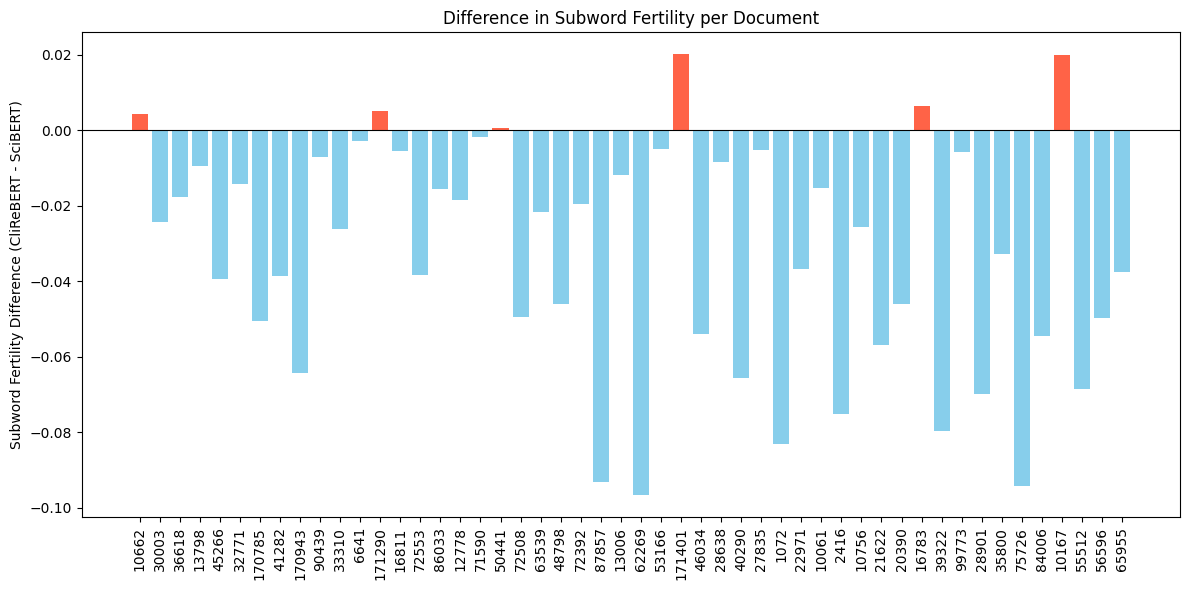

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Compute difference per paper
differences = np.array(clirebert_scores) - np.array(scibert_scores)

plt.figure(figsize=(12, 6))
bars = plt.bar(paper_labels, differences, color=np.where(differences > 0, 'tomato', 'skyblue'))

plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Subword Fertility Difference (CliReBERT - SciBERT)")
plt.title("Difference in Subword Fertility per Document")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


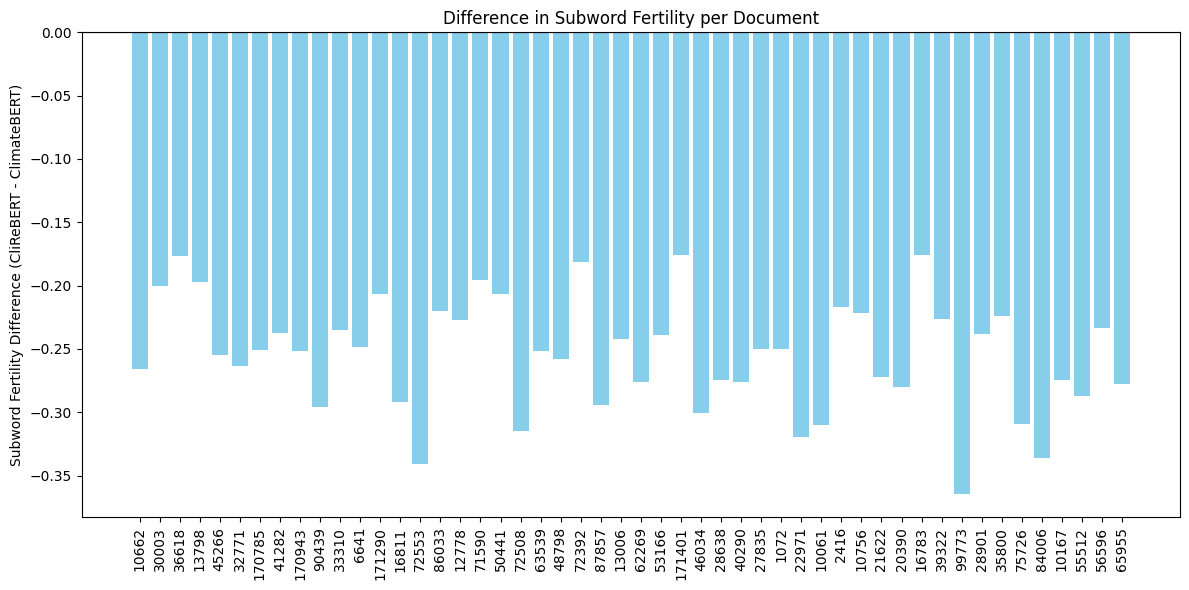

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Compute difference per paper
differences = np.array(clirebert_scores) - np.array(climatebert_scores)

plt.figure(figsize=(12, 6))
bars = plt.bar(paper_labels, differences, color=np.where(differences > 0, 'tomato', 'skyblue'))

plt.axhline(0, color='black', linewidth=0.8)
plt.ylabel("Subword Fertility Difference (CliReBERT - ClimateBERT)")
plt.title("Difference in Subword Fertility per Document")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipykernel_46927/3865642432.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=tokenizer_labels, y=all_scores, palette='muted')
/home/p0l3/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/p0l3/.local/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/p0l3/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

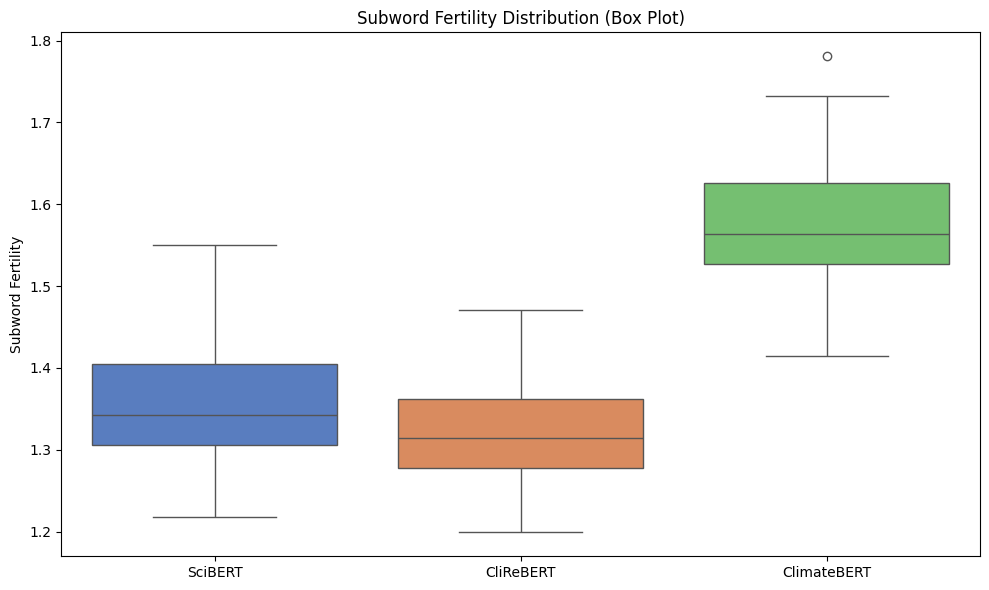

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Collect scores as in the violin plot
all_scores = scibert_scores + clirebert_scores + climatebert_scores
tokenizer_labels = ['SciBERT'] * len(scibert_scores) + ['CliReBERT'] * len(clirebert_scores) + ['ClimateBERT'] * len(climatebert_scores)

plt.figure(figsize=(10, 6))
sns.boxplot(x=tokenizer_labels, y=all_scores, palette='muted')
plt.ylabel("Subword Fertility")
plt.title("Subword Fertility Distribution (Box Plot)")
plt.tight_layout()
plt.show()

